# Running Bernulli-RBM

In [1]:
import pandas as pd
from sklearn.neural_network import BernoulliRBM
import numpy as np
import os
%matplotlib inline

In [2]:
def bip():
    os.system("printf '\a'")
    
#def set_trace():
import pdb
from pdb import set_trace as bp

In [3]:
df = pd.read_csv('dataset.csv', usecols=['Date','Open','High','Low','Close','Volume','Adj Close','Stock'])

In [4]:
df = df[:50000]

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Stock
0,2006-01-03,0.710553,0.707904,0.705324,0.714383,5307000,21.399132,A
1,2006-01-04,0.715643,0.716495,0.723974,0.717436,4195800,21.456621,A
2,2006-01-05,0.712250,0.738488,0.726687,0.747286,4835400,22.018748,A
3,2006-01-06,0.747879,0.749485,0.748389,0.753392,6146300,22.133729,A
4,2006-01-09,0.752969,0.749828,0.759580,0.750000,4082800,22.069850,A


## Creating `Day` Column

In [6]:
df.loc[:,'Date'] = pd.to_datetime(df.loc[:,'Date'])
df.loc[:,'Day'] = df.loc[:,'Date'].dt.dayofweek/6

## Creating `return` column

In [7]:
df.loc[:,'Return'] = np.nan

In [8]:
def get_return(group):
    #if group.name != 'A': bp()
    df.loc[(df.loc[:,'Stock'] == group.name) & (df.index != group.index[0]), 'Return'] = (group.loc[:,'Close'].iloc[1:].reset_index(drop=True)/group.loc[:,'Close'].iloc[:-1].reset_index(drop=True)-1).values
    

In [9]:
df.groupby('Stock').apply(get_return);
bip()

In [10]:
df[df['Stock'] == "AGNC"].head()

,Date,Open,High,Low,Close,Volume,Adj Close,Stock,Day,Return
49768,2008-05-15,0.341564,0.287530,0.396133,0.312246,4197900,4.447256,AGNC,0.500000,NaN
49769,2008-05-16,0.326867,0.309322,0.400552,0.349391,1109600,4.594348,AGNC,0.666667,0.118959
49770,2008-05-19,0.364491,0.308111,0.400552,0.321532,329700,4.484029,AGNC,0.000000,-0.079734
49771,2008-05-20,0.340976,0.297215,0.401657,0.312246,110100,4.447256,AGNC,0.166667,-0.028881
49772,2008-05-21,0.328630,0.274818,0.400000,0.306442,300300,4.424272,AGNC,0.333333,-0.018587


In [11]:
print("The number of NaN Returns %smatches the number of stocks" % "" if df['Return'].isnull().sum() == len(df['Stock'].unique()) else "not ")

The number of NaN Returns matches the number of stocks


## Categorizing returns

In [12]:
df.loc[df['Return'] < -0.03,'y'] = 0
df.loc[(df['Return'] >= -0.03) & (df['Return'] <-0.01),'y'] = 1
df.loc[(df['Return'] >= -0.01) & (df['Return'] <0.01),'y'] = 2
df.loc[(df['Return'] >= 0.01) & (df['Return'] <0.03),'y'] = 3
df.loc[df['Return'] >= 0.03,'y'] = 4
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Stock,Day,Return,y
0,2006-01-03,0.710553,0.707904,0.705324,0.714383,5307000,21.399132,A,0.166667,NaN,NaN
1,2006-01-04,0.715643,0.716495,0.723974,0.717436,4195800,21.456621,A,0.333333,0.004273,2.0
2,2006-01-05,0.712250,0.738488,0.726687,0.747286,4835400,22.018748,A,0.500000,0.041608,4.0
3,2006-01-06,0.747879,0.749485,0.748389,0.753392,6146300,22.133729,A,0.666667,0.008171,2.0
4,2006-01-09,0.752969,0.749828,0.759580,0.750000,4082800,22.069850,A,0.000000,-0.004502,2.0


In [14]:
df['y'].describe()

count    49956.00000
mean         2.01123
std          1.43475
min          0.00000
25%          1.00000
50%          2.00000
75%          3.00000
max          4.00000
Name: y, dtype: float64

## Some histogram for fun

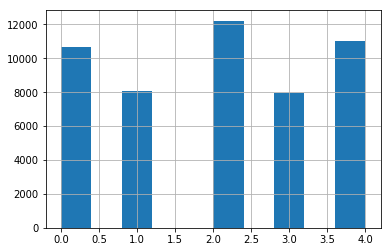

In [15]:
df['y'].hist()

# Restricted Boltzmann Machine

## Getting X and Y

In [16]:
X = df[df['Return'].isnull() == False].loc[:,['Return']]

In [17]:
X.describe()

,Return
count,4.995600e+04
mean,inf
std,NaN
min,-1.000000e+00
25%,-2.450485e-02
50%,0.000000e+00
75%,2.528770e-02
max,inf


In [71]:
rbm = BernoulliRBM()
rbm.fit(df:loc[:,])